# Exploratory Data Analysis with Titanic dataset




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
# we need below line for displaying graphis inline (in  a notebook)
%matplotlib inline

In [4]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [5]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_data.shape

(891, 12)

In [7]:
test_data.shape

(418, 11)

In [8]:
# we can find the missing column in train_data
set(train_data.columns).difference(set(test_data.columns))

{'Survived'}

In [10]:
# we can unique columsn in BOTH dataframes
set(test_data.columns).symmetric_difference(set(train_data.columns))

{'Survived'}

In [11]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# we can describe non numerical data (ie objects here)
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thayer, Mrs. John Borland (Marian Longstreth M...",male,1601,G6,S
freq,1,577,7,4,644


In [14]:
# we can uniques using Python set operation
set(train_data['Embarked'])

{'C', 'Q', 'S', nan}

In [17]:
# we can uniques using Python set operation
set(train_data)

{'Age',
 'Cabin',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket'}

In [19]:
myalphatrain = train_data[sorted(list(set(train_data)))]
myalphatrain.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [21]:
# we can sort columns alphabetically 
sortedbycolumn = train_data[sorted(train_data.columns)]
sortedbycolumn.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [15]:
#we can get uniques in numpy ndarray
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
# we can find out the missing data fields
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

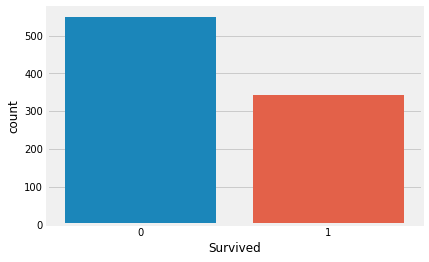

In [23]:
# we can look at survival data using sb.countplot
sb.countplot('Survived',data=train_data)
plt.show()

In [28]:
len(train_data[train_data['Survived'] == 1])/len(train_data)

0.3838383838383838

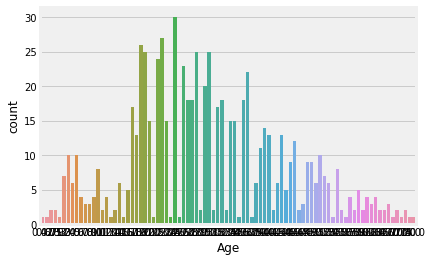

In [30]:
sb.countplot('Age',data=train_data)
plt.show()

From the above graph it is clear that not many persons survived.
Out of 891 persons in training dataset only 350, 38.4% of total training dataset survived. We will get more insight of data by exploring more.

Here we'll explore features

In [33]:
# we can group by multiple columns
grouped = train_data.groupby(['Sex', 'Survived'])['Survived'].count()
grouped

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [32]:
type(train_data.groupby(['Sex', 'Survived'])['Survived'].count())

pandas.core.series.Series

In [34]:
grouped['female']

Survived
0     81
1    233
Name: Survived, dtype: int64

In [39]:
# when we have multiple indexes
grouped[['male']][0]

468

It is clear that 233 female survived out of 344. And out of 577 male 109 survived. The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

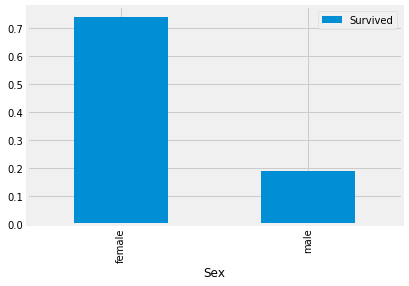

In [40]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

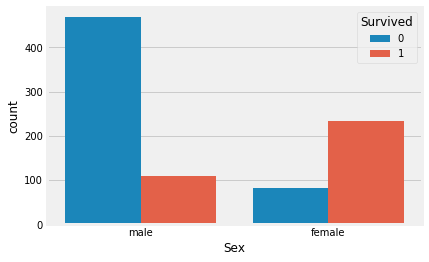

In [45]:
#train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sb.countplot('Sex',hue='Survived',data=train_data)
plt.show()

'Sex' is very interesting feature. Isn't it? Let's explore more features

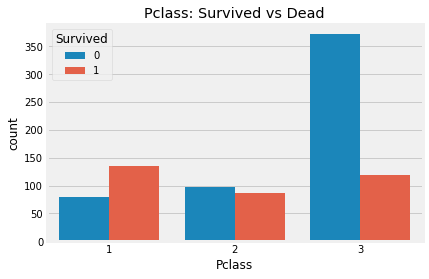

In [46]:
# Pclass is a column name and we color by another column 'Survived'
sb.countplot('Pclass', hue='Survived', data=train_data)
plt.title('Pclass: Survived vs Dead')
plt.show()

Wow.... That looks amazing. It is usually said that Money can't buy Everything, But it is clearly seen that pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survivail and non-survival rate is 49% and 51% approx.
While in Class 1 almost 68% people survived. So money and status matters here.

Let's dive in again into data to check more interesting observations.

In [50]:
# cmap is a color map setting 
pd.crosstab([train_data['Sex'],train_data['Survived']],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [49]:
ctab = pd.crosstab([train_data['Sex'],train_data['Survived']],train_data.Pclass,margins=True)
ctab

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [51]:
ctab.index

MultiIndex(levels=[['All', 'female', 'male'], [0, 1, '']],
           codes=[[1, 1, 2, 2, 0], [0, 1, 0, 1, 2]],
           names=['Sex', 'Survived'])

In [52]:
ctab.columns

Index([1, 2, 3, 'All'], dtype='object', name='Pclass')

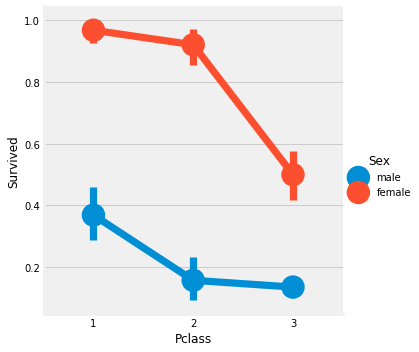

In [53]:
sb.factorplot('Pclass', 'Survived', hue='Sex', data=train_data)
plt.show()

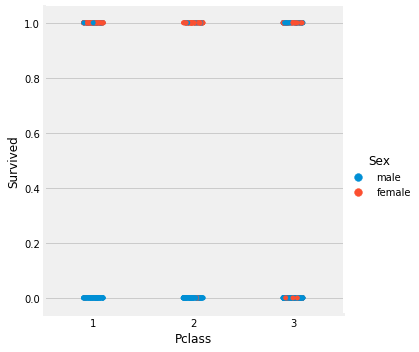

In [57]:
sb.catplot('Pclass', 'Survived', hue='Sex', data=train_data)
plt.show()

I use FactorPlot and CrossTab here because with these plots categorical variables can easily be visualized. Looking at FactorPlot and CrossTab, it is clear that women survival rate in Class 1 is about 95-96%, as only 3 out of 94 women died. So, it is now more clear that irrespective of Class, women are given first priority during Rescue. Because survival rate for men in even Class 1 is also very low.
From this conclusion, PClass is also a important feature.

In [58]:
print('Oldest person Survived was of:',train_data['Age'].max())
print('Youngest person Survived was of:',train_data['Age'].min())
print('Average person Survived was of:',train_data['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


In [59]:
survivors = train_data[train_data["Survived"] == 1]
survivors.shape

(342, 12)

In [60]:
survivors.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
# this returns max for ALL columns seperately 
survivors.max()

PassengerId                        890
Survived                             1
Pclass                               3
Name           de Mulder, Mr. Theodore
Sex                               male
Age                                 80
SibSp                                4
Parch                                5
Ticket                       WE/P 5735
Fare                           512.329
dtype: object

In [63]:
survivors.min()

PassengerId                                   2
Survived                                      1
Pclass                                        1
Name           Abbott, Mrs. Stanton (Rosa Hunt)
Sex                                      female
Age                                        0.42
SibSp                                         0
Parch                                         0
Ticket                                   110152
Fare                                          0
dtype: object

In [27]:
survivors['Age'].max()

80.0

In [61]:
# with this we can select the oldest passenger(s)
survivors[survivors['Age'] == survivors['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [62]:
# with this we can select the oldest passenger(s)
survivors[survivors['Age'] == survivors['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [28]:
survivors['Age'].min()

0.42

In [29]:
survivors.min()


PassengerId                                   2
Survived                                      1
Pclass                                        1
Name           Abbott, Mrs. Stanton (Rosa Hunt)
Sex                                      female
Age                                        0.42
SibSp                                         0
Parch                                         0
Ticket                                   110152
Fare                                          0
dtype: object

In [64]:
# survivors mean should not be equal to all passengers mean
survivors['Age'].mean(), train_data['Age'].mean()

(28.343689655172415, 29.69911764705882)

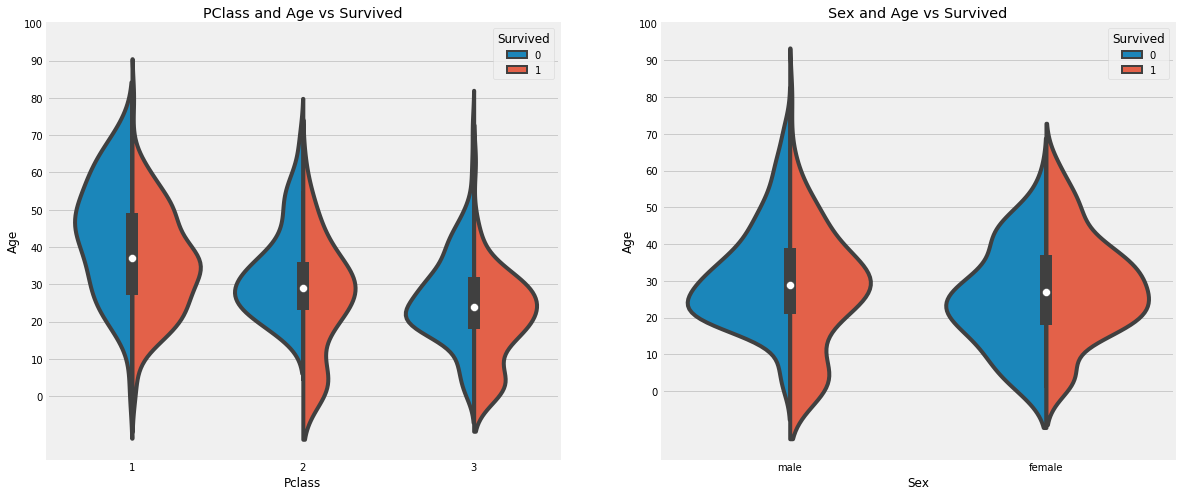

In [68]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot('Pclass','Age',hue='Survived',data=train_data,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot("Sex","Age", hue="Survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


From above violen plots, following observations are clear,
1) The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two. 
2) Survival rate of children, for age 10 and below is good irrespective of Class
3) Survival rate between age 20-30 is well and is quite better for women.

Now, in Age feature we have 177 null values filled with NaN. We have to deal with it. But we can't enter mean of age in every NaN column, because our average/mean is 29 and we cannot put 29 for a child or some olde man. So we have to discover something better. 
Let's do something more interesting with dataset by exploring more.

What is, if I look at 'Name' feature, It looks interesting. Let's check it....

In [69]:
train_data['Name'][:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [33]:
# this loop looks unneeded
# train_data['Initial']=0
# for i in train_data:
#     train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [70]:
# we can do without loop and create new column immediately
train_data['Ini'] = train_data['Name'].str.extract('([A-Za-z]+)\.')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [73]:
# Regex in Python
import re

txt = "The rain in Spain"
txt2 = "The winter in Spain"
x = re.search("^The.*Spain$", txt)
x2 = re.search("^The.*Spain$", txt2)

In [82]:
text = "Bumba tumba satuumba"
x = re.findall("t*mb", text)
print(re.fullmatch("t*mb", text))


None


In [74]:
x, x2

(<re.Match object; span=(0, 17), match='The rain in Spain'>,
 <re.Match object; span=(0, 19), match='The winter in Spain'>)

In [83]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [37]:
train_data['First']=""

In [84]:
train_data['First']=train_data['Name'].str.extract('[A-Za-z]+\. ([A-Za-z]+)') #extracting First Name

In [85]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William


In [86]:
train_data['LastName'] = train_data['Name'].str.extract('^([A-Za-z]+)')

In [87]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William,Allen
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,James,Moran
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Timothy,McCarthy
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Gosta,Palsson
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Oscar,Johnson
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Nicholas,Nasser


In [29]:
# regexp101 for hints on regular expression
# seperate lecture on regular expression might be in order
# we do not need loops
#for i in train_data:
#    train_data['First']=train_data.Name.str.extract('[A-Za-z]+\. ([A-Za-z]+)') #extracting First Name

In [41]:
train_data["LastName"] = train_data['Name'].str.extract('([A-Za-z]+)\,')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Ini,First,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,Owen,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,John,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,Jacques,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,William,Allen


In [88]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William,Allen


In [89]:
train_data['First'].isnull().sum()

16

In [90]:
train_data[train_data.First.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Mrs,NaN,Hewlett
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,Mrs,NaN,Nye
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,Mrs,NaN,Chibnall
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S,Mrs,NaN,Pinsky
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S,Mrs,NaN,Parrish
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S,Mrs,NaN,Mellinger
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S,Mrs,NaN,Ball
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C,Mrs,NaN,Barbara
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C,Mrs,NaN,Moussa
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,Mrs,NaN,Turkula


In [91]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William,Allen


In [93]:
pd.crosstab(train_data['Ini'],train_data.Sex).T.style.background_gradient(cmap='summer_r')


Ini,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are many names which are not relevant like Mr, Mrs etc. So I will replace them with some relevant names,

In [95]:
train_data.groupby('Ini')['Age'].mean()

Ini
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [96]:
train_data['Ini'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [97]:
train_data.groupby('Ini')['Age'].mean()

Ini
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [98]:
# here we replace missing values with appropriate mean
train_data.loc[(train_data.Age.isnull()) & (train_data['Ini']=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull()) & (train_data['Ini']=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull()) & (train_data['Ini']=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull()) & (train_data['Ini']=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull()) & (train_data['Ini']=='Other'),'Age']=46

In [99]:
# make sure there is no missing Age anywhere
train_data["Age"].isnull().any()

False

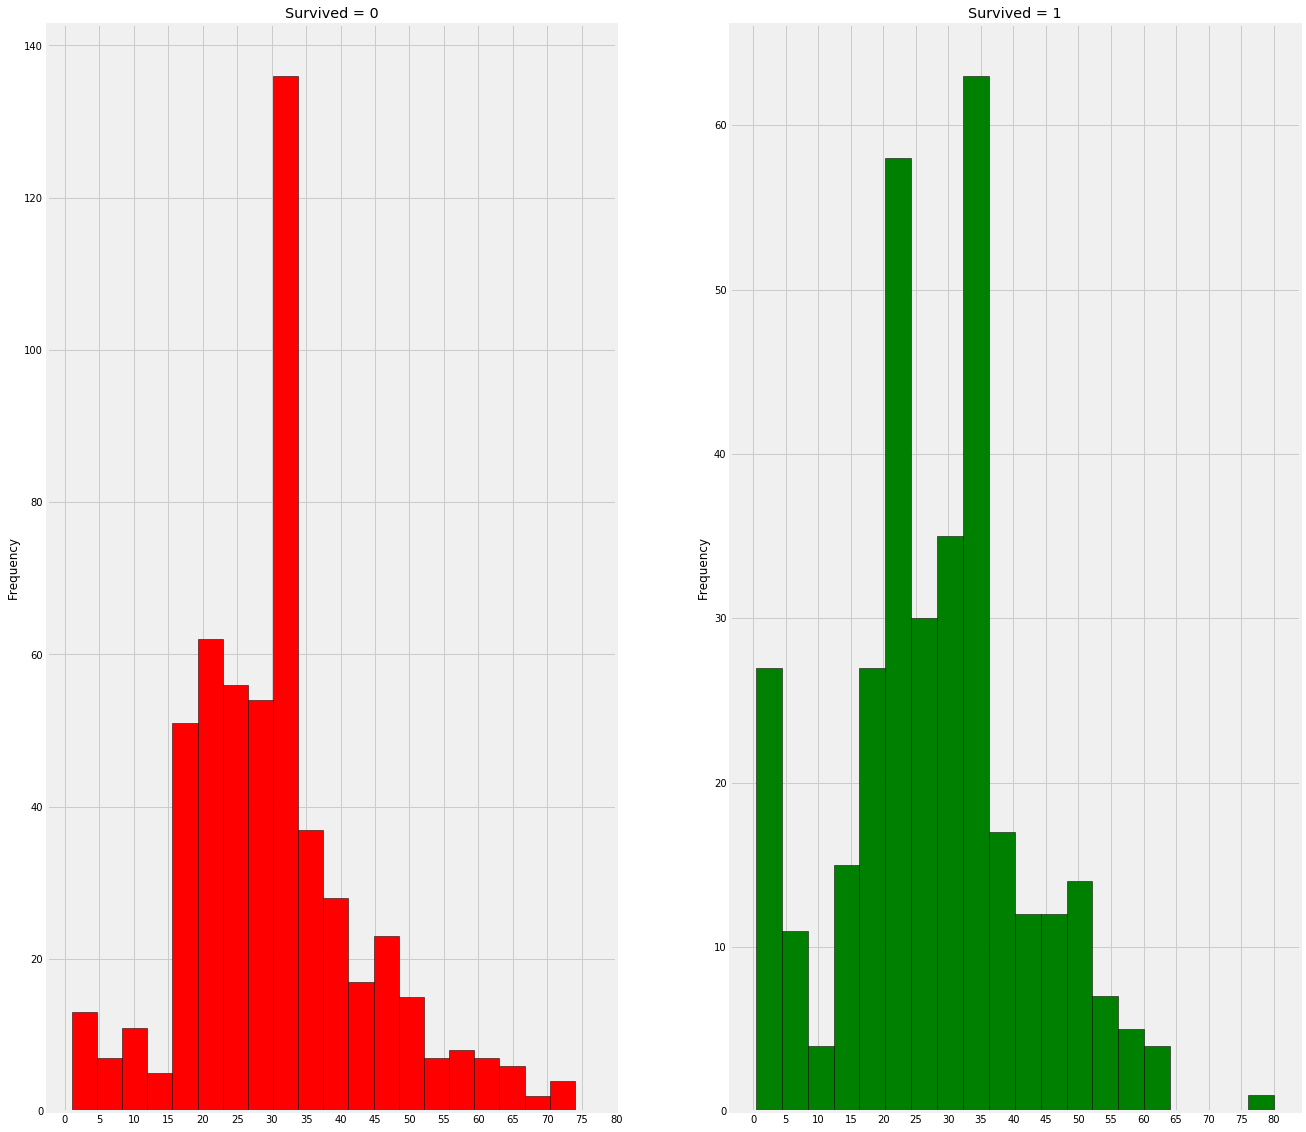

In [100]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

From the above plots, I found the following observations


(1) First priority during Rescue is given to children and women, as the persons<5 are save by large numbers
(2) The oldest saved passanger is of 80
(3) The most deaths were between 30-40

In [103]:
train_data[train_data['Ini']=='Other'].count()

PassengerId    9
Survived       9
Pclass         9
Name           9
Sex            9
Age            9
SibSp          9
Parch          9
Ticket         9
Fare           9
Cabin          1
Embarked       9
Ini            9
First          9
LastName       9
dtype: int64

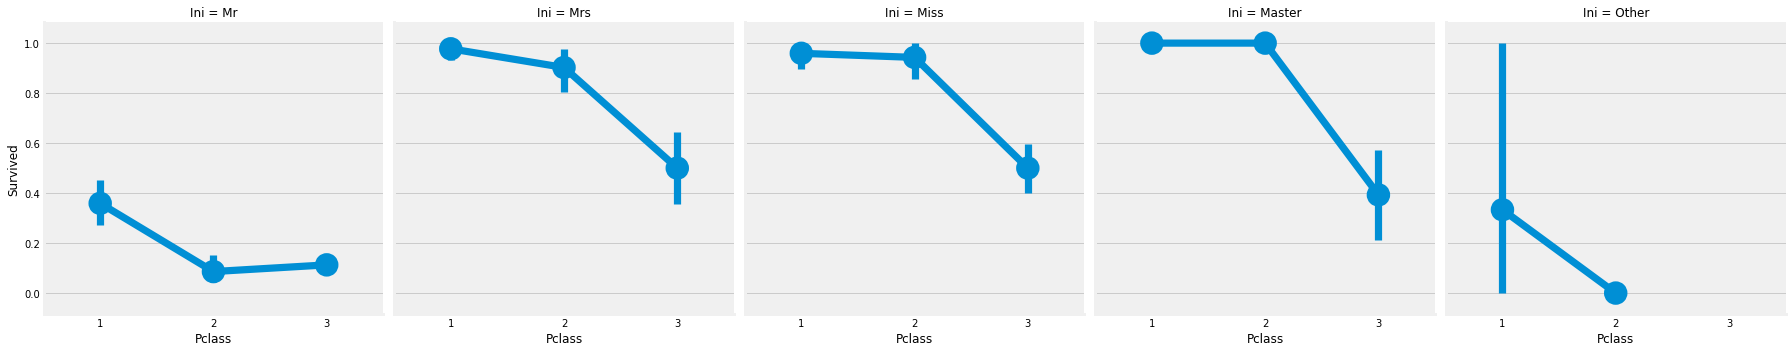

In [102]:
sb.factorplot('Pclass','Survived',col='Ini',data=train_data)
plt.show()

From the above FactorPlots it is Clearly seen that women and children were saved irrespective of PClass

Let's explore some more

# Feature: SibSip

SibSip feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc
and Spouse= husband,wife

In [104]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [105]:
pd.crosstab([train_data.SibSp],train_data['Pclass']).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


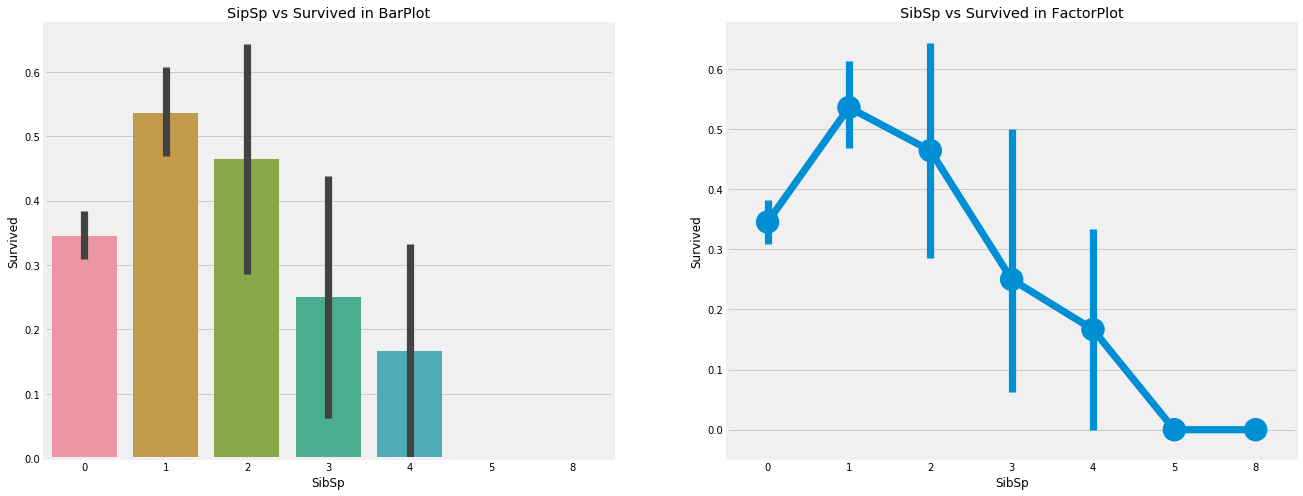

In [106]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sb.barplot('SibSp','Survived', data=train_data,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sb.factorplot('SibSp','Survived', data=train_data,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

In [44]:
pd.crosstab(train_data.SibSp,train_data.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


There are many interesting facts with this feature. Barplot and FactorPlot shows that if a passanger is alone in ship with no siblings, survival rate is 34.5%. The graph decreases as no of siblings increase. This is interesting because, If I have a family onboard, I will save them instead of saving myself. But there's something wrong, the survival rate for families with 5-8 members is 0%. Is this because of PClass?
Yes this is PClass,  The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

That are some interesting facts we have observed with Titanic dataset.

In [ ]:
# Classwork
# Find out the youngest 3rd class passanger to survive.
# How about the average of all 1st class passangers to survive
# plot histogram of all 2nd class passengers separated by gender, colored by survival
# did the most expensive ticket survive
# plot 10 most expensive ticket holders

In [107]:
df = train_data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William,Allen


In [109]:
df3 = df[(df["Pclass"] == 3) & (df['Survived'] == 1)]
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Oscar,Johnson
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,Marguerite,Sandstrom
19,20,1,3,"Masselmani, Mrs. Fatima",female,36.0,0,0,2649,7.2250,NaN,C,Mrs,Fatima,Masselmani
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,Miss,Anna,McGowan


In [112]:
df[(df["Pclass"] == 1) & (df['Survived'] == 1)].mean()

PassengerId    491.772059
Survived         1.000000
Pclass           1.000000
Age             35.220000
SibSp            0.492647
Parch            0.389706
Fare            95.608029
dtype: float64

In [113]:
richSurvivors = df[(df["Pclass"] == 1) & (df['Survived'] == 1)]
richSurvivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John,Cumings
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques,Futrelle
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss,Elizabeth,Bonnell
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Mr,William,Sloper
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,36.0,1,0,PC 17569,146.5208,B78,C,Mrs,William,Spencer


In [114]:
richSurvivors.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,136.000000,136.0,136.0,136.000000,136.000000,136.000000,136.000000
mean,491.772059,1.0,1.0,35.220000,0.492647,0.389706,95.608029
std,239.006988,0.0,0.0,13.085719,0.632412,0.690387,85.286820
min,2.000000,1.0,1.0,0.920000,0.000000,0.000000,25.929200
25%,307.750000,1.0,1.0,25.750000,0.000000,0.000000,50.985450
50%,510.500000,1.0,1.0,35.000000,0.000000,0.000000,77.958300
75%,693.500000,1.0,1.0,43.250000,1.000000,1.000000,111.481225
max,890.000000,1.0,1.0,80.000000,3.000000,2.000000,512.329200


In [111]:
df[df['Age'] == df3['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Master,Assad,Thomas


In [60]:
df2 = df[df['Survived'] == 1]
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Ini,First,LastName
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,John,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,Jacques,Futrelle
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Mrs,Oscar,Johnson
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Mrs,Nicholas,Nasser


In [115]:
dsecond = df[df['Pclass'] == 2]
dsecond.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Nicholas,Nasser
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Mrs,NaN,Hewlett
17,18,1,2,"Williams, Mr. Charles Eugene",male,33.0,0,0,244373,13.0000,NaN,S,Mr,Charles,Williams
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,Mr,Joseph,Fynney
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,Mr,Lawrence,Beesley


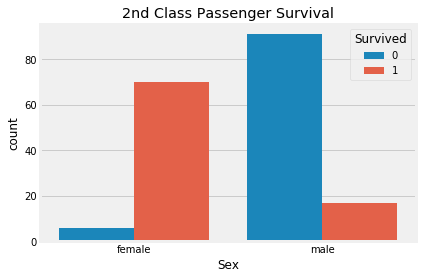

In [117]:
sb.countplot('Sex', hue='Survived', data=dsecond)
plt.title('2nd Class Passenger Survival')
plt.show()

In [121]:
expensive = df.sort_values(['Fare','Survived'],ascending=[False,False])
expensive.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,Anna,Ward
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,Thomas,Cardeza
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,Gustave,Lesurer
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Mabel,Fortune
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Alice,Fortune
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,Charles,Fortune
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Mr,Mark,Fortune
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,Emily,Ryerson
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,Susan,Ryerson
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Mrs,James,Baxter


In [124]:
expensive.head(50)['Survived'].unique()

array([1, 0], dtype=int64)

In [125]:
expensive.head(50)['Survived'].mean()

0.76

In [126]:
rich50 = expensive.head(50)
rich50.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,Anna,Ward
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,Thomas,Cardeza
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,Gustave,Lesurer
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Mabel,Fortune
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Alice,Fortune


In [127]:
rich50survivors = rich50[rich50['Survived'] == 1]
rich50survivors.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,38.000000,38.0,38.0,38.000000,38.000000,38.000000,38.000000
mean,467.447368,1.0,1.0,31.629474,0.684211,0.789474,193.166116
std,224.863526,0.0,0.0,12.967474,0.841661,0.874809,107.447442
min,32.000000,1.0,1.0,0.920000,0.000000,0.000000,108.900000
25%,307.250000,1.0,1.0,22.000000,0.000000,0.000000,123.412500
50%,386.000000,1.0,1.0,35.000000,0.500000,0.500000,151.550000
75%,698.250000,1.0,1.0,39.750000,1.000000,2.000000,227.525000
max,857.000000,1.0,1.0,58.000000,3.000000,2.000000,512.329200


In [129]:
# find three youngest
df.sort_values("Age").head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ini,First,LastName
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Master,Assad,Thomas
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,Master,Viljo,Hamalainen
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,Miss,Eugenie,Baclini
